In [1]:
import pandas as pd
import random
import numpy as np

TARGET_COL = "pose"
SEED = 42

random.seed(SEED)
np.random.seed(SEED)

In [2]:
df = pd.read_csv("data/yoga_ds_Xy.csv")
df.head()

,pose,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
0,hanumanasana,0.261698,0.512255,0.237344,0.517355,0.238441,0.486026,0.242483,0.497878,0.248089,...,0.651845,0.414223,0.678855,0.221365,0.722782,0.674401,0.683820,0.050615,0.795440,0.924660
1,hanumanasana,0.394864,0.491497,0.370693,0.487102,0.375714,0.461120,0.381811,0.450995,0.400140,...,0.807697,0.396388,0.854739,0.710447,0.805349,0.174530,0.908731,0.943022,0.702517,0.003883
2,hanumanasana,0.430713,0.753430,0.439265,0.780632,0.419011,0.763575,0.482887,0.787360,0.431683,...,0.622483,0.486750,0.743239,0.589924,0.719260,0.579058,0.728648,0.731057,0.723543,0.732710
3,hanumanasana,0.369197,0.440116,0.368485,0.460600,0.366005,0.458955,0.407975,0.471238,0.402241,...,0.778978,0.435595,0.848863,0.726469,0.786196,0.241361,0.854160,0.963011,0.808341,0.036816
4,hanumanasana,0.262922,0.548760,0.245587,0.531681,0.244322,0.532350,0.257699,0.483209,0.258080,...,0.624212,0.459428,0.690590,0.708224,0.755988,0.298930,0.741362,0.910159,0.699116,0.092350


In [3]:
unique_poses = df["pose"].unique()

In [4]:
unique_poses.shape

(107,)

In [5]:
df.shape

(5994, 35)

In [6]:
X, y = df.drop(TARGET_COL, axis=1).to_numpy(), df[TARGET_COL].to_numpy()

In [7]:
X

array([[0.26169783, 0.51225549, 0.23734351, ..., 0.05061511, 0.79543984,
        0.92466015],
       [0.39486408, 0.49149728, 0.37069297, ..., 0.94302195, 0.70251673,
        0.00388286],
       [0.43071288, 0.75342995, 0.43926528, ..., 0.73105693, 0.72354347,
        0.73271024],
       ...,
       [0.23696722, 0.54619014, 0.23403694, ..., 0.73371381, 0.9340629 ,
        0.21788606],
       [0.31524032, 0.45087713, 0.29702532, ..., 0.86020398, 0.9304722 ,
        0.23826832],
       [0.27252325, 0.55586886, 0.2526651 , ..., 0.76022065, 0.9412418 ,
        0.17346251]])

In [8]:
X.take([0, 1, 5], axis=0)

array([[0.26169783, 0.51225549, 0.23734351, 0.51735502, 0.23844127,
        0.48602632, 0.24248251, 0.49787834, 0.24808878, 0.43095765,
        0.36717844, 0.53851849, 0.38760287, 0.38436916, 0.49961963,
        0.63676196, 0.57135969, 0.40893739, 0.50727457, 0.61379766,
        0.51254141, 0.53712767, 0.64262086, 0.48303765, 0.65184456,
        0.41422325, 0.67885518, 0.22136547, 0.72278249, 0.67440146,
        0.68381965, 0.05061511, 0.79543984, 0.92466015],
       [0.39486408, 0.49149728, 0.37069297, 0.487102  , 0.37571383,
        0.46112013, 0.38181058, 0.45099455, 0.40013996, 0.4024803 ,
        0.46927312, 0.47687504, 0.48903829, 0.36995849, 0.28492588,
        0.45973617, 0.29315618, 0.36429968, 0.12957139, 0.41115224,
        0.12824076, 0.3665314 , 0.80108428, 0.53141189, 0.80769682,
        0.39638758, 0.85473901, 0.71044707, 0.80534947, 0.17453019,
        0.90873098, 0.94302195, 0.70251673, 0.00388286],
       [0.41305649, 0.46097481, 0.40806714, 0.47696158, 0.40680441,
  

In [9]:
print(f"{X.shape=},\n{y.shape=}")

X.shape=(5994, 34),
y.shape=(5994,)


In [10]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=SEED)

In [11]:
# print(f"{X_train.shape=},\n{y_train.shape=}\n\n{X_test.shape=},\n{y_test.shape=}")

In [12]:

from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from tqdm import tqdm


classifiers = [
    KNeighborsClassifier(),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    MLPClassifier(),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

N_FOLDS = 5
skf = StratifiedKFold(n_splits=N_FOLDS, shuffle=True, random_state=SEED)

metrics_rows = []
fold_indices_rows = []
for fold, (train_indices, test_indices) in enumerate(tqdm(skf.split(X, y), desc="Folds: ", total=N_FOLDS)):
    X_train, y_train = X.take(train_indices, axis=0), y.take(train_indices, axis=0)
    X_test, y_test = X.take(test_indices, axis=0), y.take(test_indices, axis=0)
    fold_indices_rows.append({
        "Fold": fold,
        "TrainIndices": train_indices,
        "TestIndices": test_indices,
    })
    for clf in tqdm(classifiers, desc="Classifiers: ", leave=False):
        clf_name = clf.__class__.__name__

        clf.fit(X_train, y_train)
        y_preds = clf.predict(X_test)

        clf_report = classification_report(y_test, y_preds, output_dict=True, zero_division=0)
        micro_f1 = f1_score(y_test, y_preds, average="micro")
        micro_precision = precision_score(y_test, y_preds, average="micro")
        micro_recall = recall_score(y_test, y_preds, average="micro")

        metrics_rows.append({
            "Model": clf_name,
            "Pose": "_overall",
            "CvFold": fold,
            "F1": micro_f1,
            "Precision": micro_precision,
            "Recall": micro_recall,
            "Support": np.nan,
        })
        for key, value in clf_report.items():
            if key not in unique_poses:
                continue
            metrics_rows.append({
                "Model": clf_name,
                "Pose": key,
                "CvFold": fold,
                "F1": value["f1-score"],
                "Precision": value["precision"],
                "Recall": value["recall"],
                "Support": value["support"],
            })

Folds:   0%|          | 0/5 [00:00<?, ?it/s]/home/jedrz/miniconda3/envs/yoga/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/jedrz/miniconda3/envs/yoga/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
Folds:  20%|██        | 1/5 [00:26<01:44, 26.19s/it]/home/jedrz/miniconda3/envs/yoga/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/jedrz/miniconda3/envs/yoga/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
Folds:  40%|████      | 2/5 [00:45<01:05, 21.8

In [13]:
set(clf_report.keys()) - set(df["pose"].unique())

{'accuracy', 'macro avg', 'weighted avg'}

In [14]:
metrics_df = pd.DataFrame.from_records(metrics_rows)
metrics_df

,Model,Pose,CvFold,F1,Precision,Recall,Support
0,KNeighborsClassifier,_overall,0,0.736447,0.736447,0.736447,NaN
1,KNeighborsClassifier,adho mukha svanasana,0,0.812500,0.722222,0.928571,14.0
2,KNeighborsClassifier,adho mukha vriksasana,0,0.733333,0.611111,0.916667,12.0
3,KNeighborsClassifier,agnistambhasana,0,0.363636,0.400000,0.333333,6.0
4,KNeighborsClassifier,ananda balasana,0,0.869565,0.909091,0.833333,12.0
...,...,...,...,...,...,...,...
4315,QuadraticDiscriminantAnalysis,virabhadrasana iii,4,0.631579,1.000000,0.461538,13.0
4316,QuadraticDiscriminantAnalysis,virasana,4,0.375000,0.500000,0.300000,10.0
4317,QuadraticDiscriminantAnalysis,vriksasana,4,0.700000,0.875000,0.583333,12.0
4318,QuadraticDiscriminantAnalysis,vrischikasana,4,0.555556,0.714286,0.454545,11.0


In [53]:
metrics_df.sort_values(by=["Pose", "F1"], inplace=True)
metrics_df[metrics_df.CvFold == 0].head(len(classifiers))

,Model,Pose,CvFold,F1,Precision,Recall,Support
540,AdaBoostClassifier,_overall,0,0.040033,0.040033,0.040033,NaN
216,DecisionTreeClassifier,_overall,0,0.521268,0.521268,0.521268,NaN
756,QuadraticDiscriminantAnalysis,_overall,0,0.551293,0.551293,0.551293,NaN
648,GaussianNB,_overall,0,0.593828,0.593828,0.593828,NaN
432,MLPClassifier,_overall,0,0.705588,0.705588,0.705588,NaN
108,SVC,_overall,0,0.723103,0.723103,0.723103,NaN
0,KNeighborsClassifier,_overall,0,0.736447,0.736447,0.736447,NaN
324,RandomForestClassifier,_overall,0,0.738115,0.738115,0.738115,NaN


In [16]:
fold_indices_df = pd.DataFrame.from_records(fold_indices_rows)
fold_indices_df

,Fold,TrainIndices,TestIndices
0,0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 14, 15,...","[12, 13, 16, 18, 19, 21, 29, 43, 44, 50, 53, 6..."
1,1,"[0, 2, 3, 4, 5, 6, 9, 11, 12, 13, 14, 15, 16, ...","[1, 7, 8, 10, 17, 25, 32, 41, 45, 49, 56, 57, ..."
2,2,"[0, 1, 2, 3, 5, 7, 8, 10, 11, 12, 13, 15, 16, ...","[4, 6, 9, 14, 27, 30, 33, 35, 40, 46, 48, 52, ..."
3,3,"[1, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, ...","[0, 2, 3, 15, 23, 26, 28, 36, 39, 42, 51, 58, ..."
4,4,"[0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 12, 13, 14, 15...","[5, 11, 20, 22, 24, 31, 34, 37, 38, 47, 55, 64..."


In [17]:
metrics_df.to_csv("results/baseline_clfs_cv_metrics.csv", index=False)

In [18]:
fold_indices_df.to_csv("results/baseline_clfs_cv_fold_indices.csv", index=False)

# Evaluate the significance of a cross-validated score with permutations.

[Scikit-learn permutation test score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.permutation_test_score.html#sklearn.model_selection.permutation_test_score)

In [48]:
from sklearn.model_selection import permutation_test_score

import warnings
warnings.filterwarnings("ignore")

N_PERMUTATIONS = 10
PERM_SCORING = "f1_micro"

classifiers = [
    KNeighborsClassifier(),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    MLPClassifier(),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

permutation_metrics_rows = []
for clf in tqdm(classifiers, desc="Classifiers: "):
    clf_name = clf.__class__.__name__

    score, perm_scores, pvalue = permutation_test_score(
        clf, X, y,
        scoring=PERM_SCORING,
        cv=StratifiedKFold(n_splits=N_FOLDS, shuffle=True, random_state=SEED),
        n_permutations=N_PERMUTATIONS,
        random_state=SEED,
    )
    
    permutation_metrics_rows.append({
        "Model": clf_name,
        "CvFolds": N_FOLDS,
        "Scoring": PERM_SCORING,
        "Score": score,  # The true score without permuting targets.
        "PermutationScores": perm_scores,  # The scores obtained for each permutations.
        "PValue": pvalue,  # The p-value, which approximates the probability that the score would be obtained by chance.
    })

Classifiers: 100%|██████████| 8/8 [15:09<00:00, 113.75s/it]


In [49]:
permutation_metrics_df = pd.DataFrame.from_records(permutation_metrics_rows)
permutation_metrics_df

,Model,CvFolds,Scoring,Score,PermutationScores,PValue
0,KNeighborsClassifier,5,f1_micro,0.711210,"[0.007340702672371661, 0.01134501344331183, 0....",0.090909
1,SVC,5,f1_micro,0.697361,"[0.010843900245195982, 0.011344317259374464, 0...",0.090909
2,DecisionTreeClassifier,5,f1_micro,0.517350,"[0.008675287280301754, 0.0103434832310175, 0.0...",0.090909
3,RandomForestClassifier,5,f1_micro,0.715884,"[0.010676955337015683, 0.010176816796412146, 0...",0.090909
4,MLPClassifier,5,f1_micro,0.703036,"[0.010343761704592447, 0.010176399086049726, 0...",0.090909
5,AdaBoostClassifier,5,f1_micro,0.046713,"[0.012178902563488494, 0.013347377683963125, 0...",0.090909
6,GaussianNB,5,f1_micro,0.584252,"[0.0103434832310175, 0.007341120382734082, 0.0...",0.090909
7,QuadraticDiscriminantAnalysis,5,f1_micro,0.536702,"[0.010009871888231846, 0.011011541337313649, 0...",0.090909


In [50]:
permutation_metrics_df.to_csv("results/baseline_clfs_cv_permutation_metrics.csv", index=False)

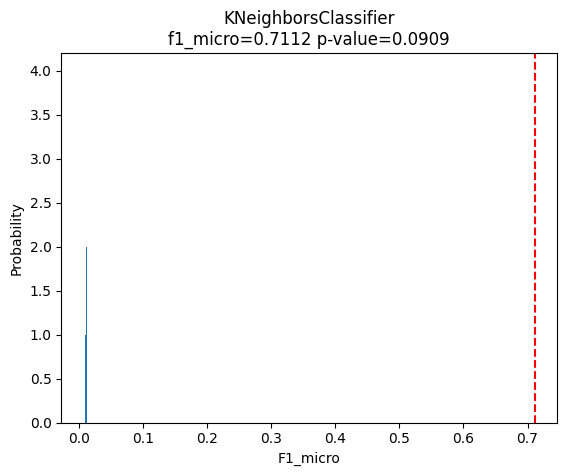

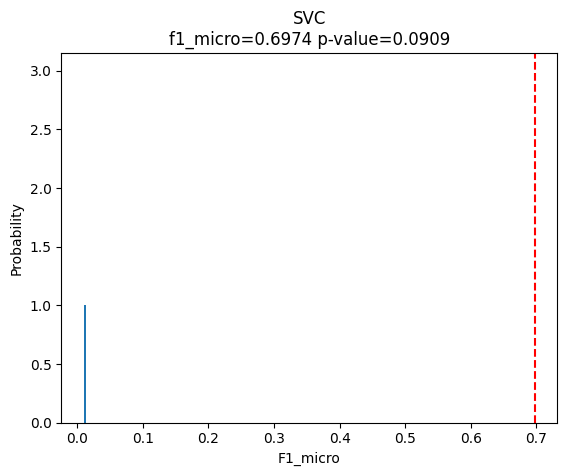

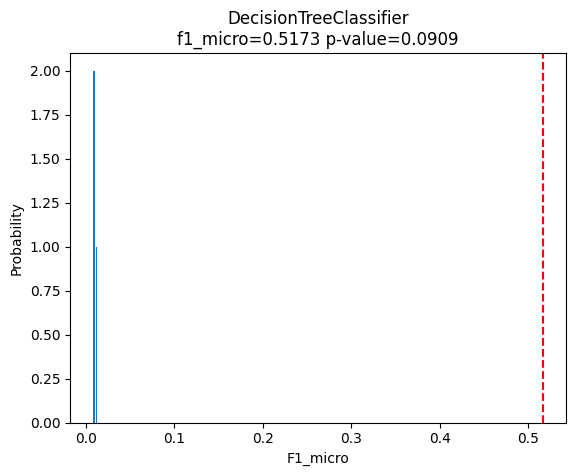

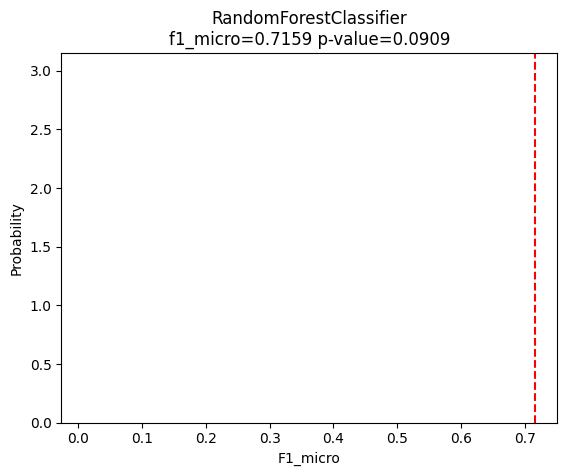

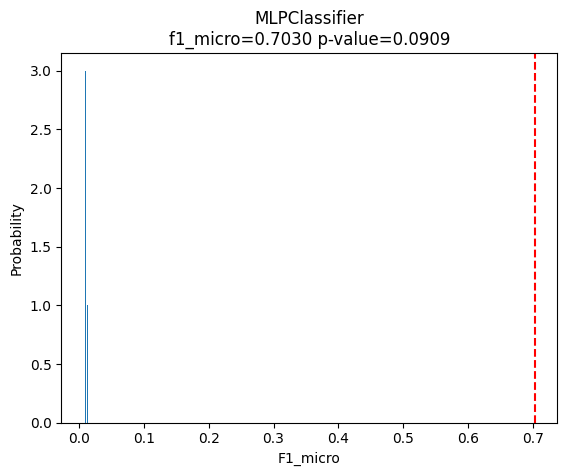

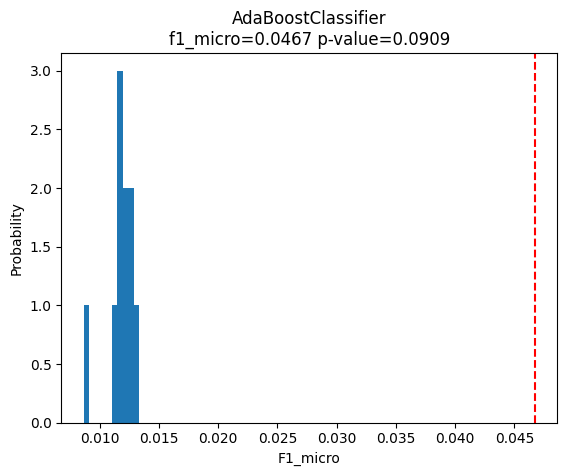

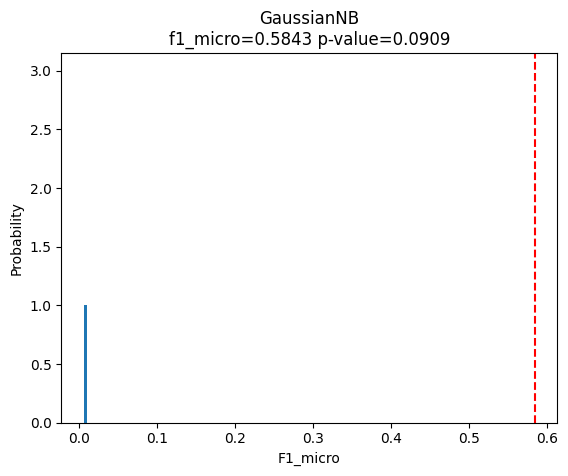

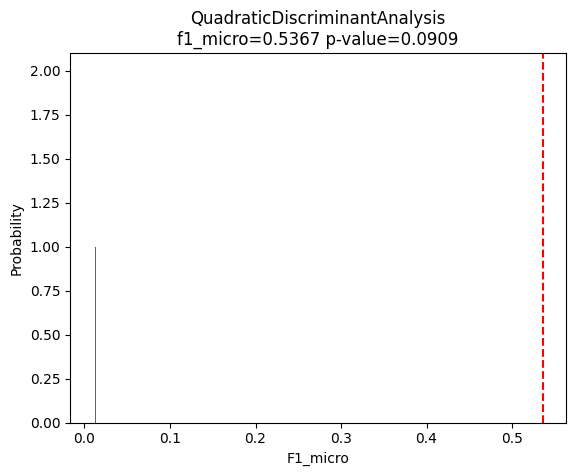

In [51]:
import matplotlib.pyplot as plt

for i, row in permutation_metrics_df.iterrows():
    plt.hist(row["PermutationScores"])
    plt.axvline(row["Score"], color="r", linestyle="--")
    plt.title(f"{row['Model']}\n{row['Scoring']}={row['Score']:.4f} p-value={row['PValue']:.4f}")
    plt.xlabel(row["Scoring"].capitalize())
    plt.ylabel("Probability")
    plt.show()